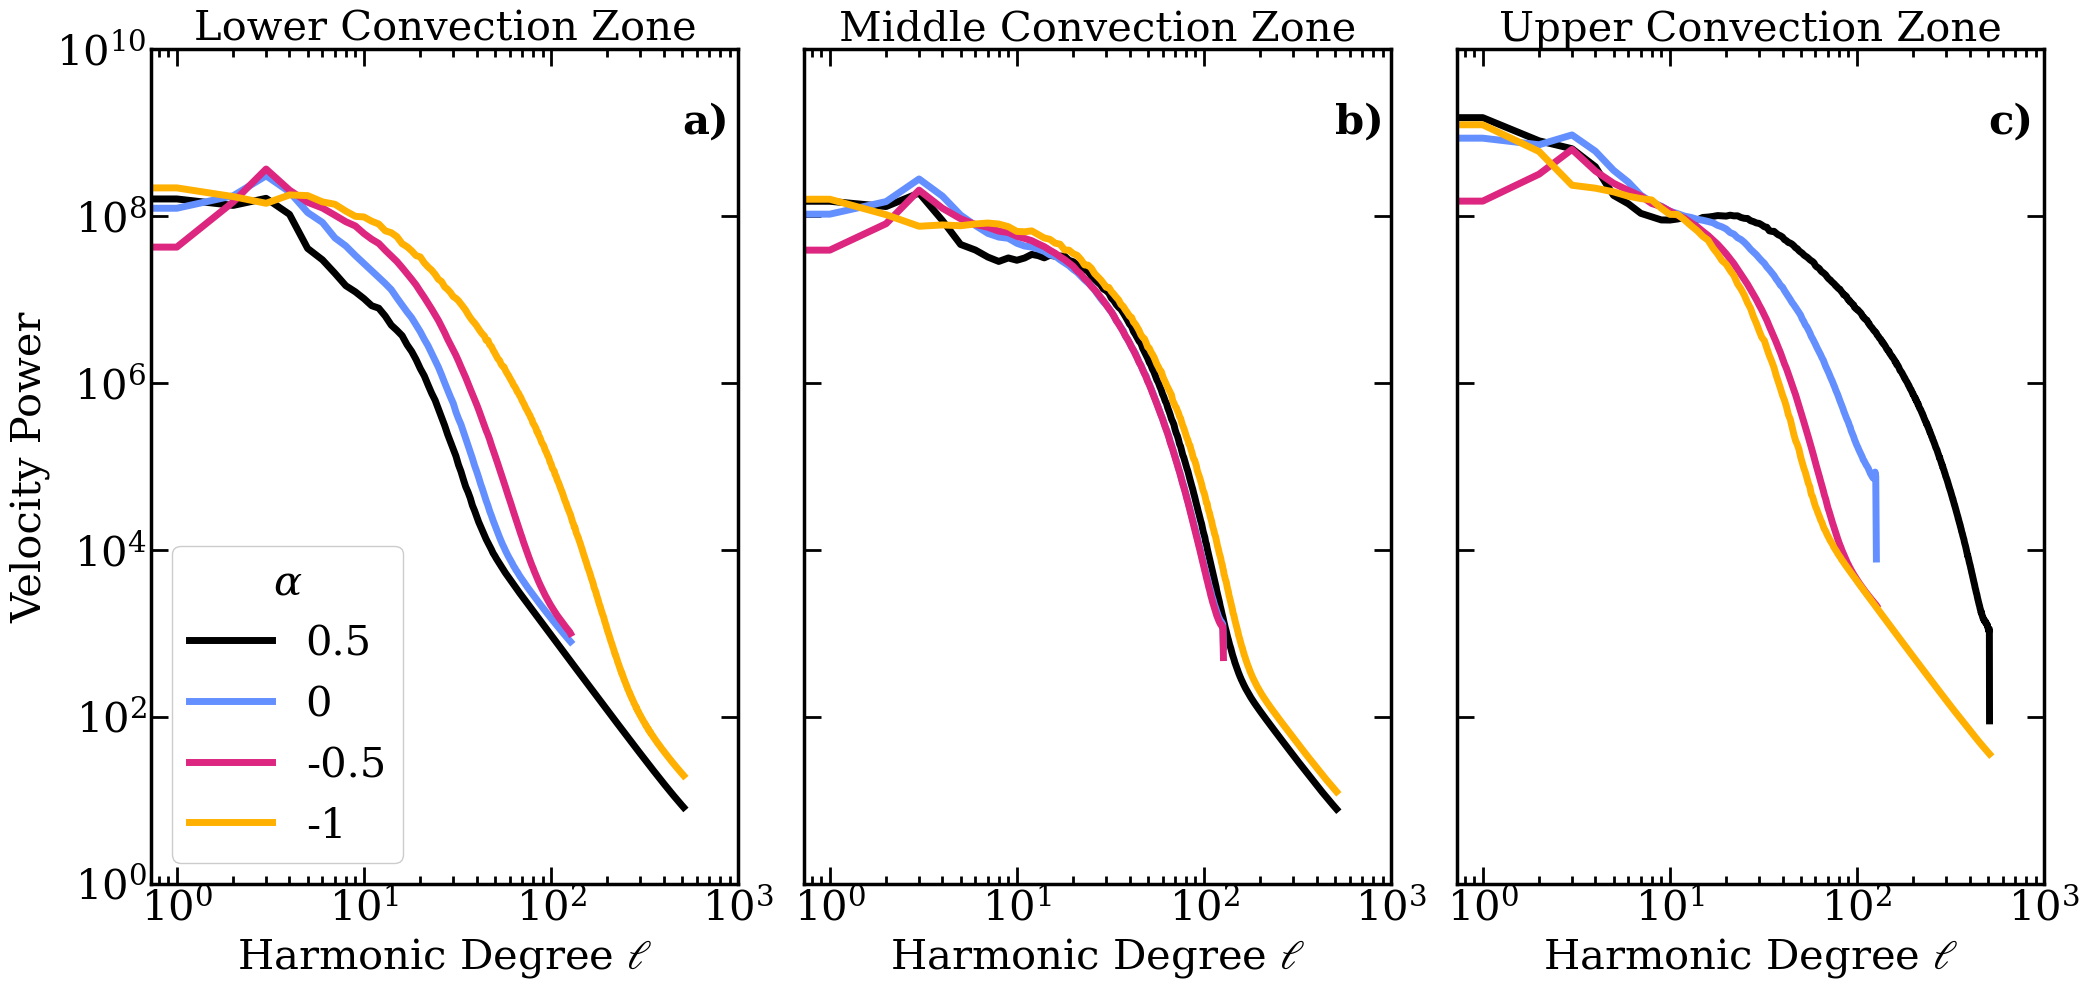

In [3]:
from rayleigh_diagnostics import G_Avgs, Shell_Slices
from New_Shell_Avgs import Shell_Avgs
from New_Shell_Spectra import Shell_Spectra
from reference_tools import equation_coefficients
import survey_utilities as su
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import *
import matplotlib as mpl
import spectral_utils


fig, ax = plt.subplots(1, 3, sharey = True, figsize = (21, 10))

colors = ['black', '#648FFF', '#DC267F', '#FFB000']
#colors = ['black', '#FFB000']
xticks = [1, 10, 100, 1000]
depth = [-1, 4, 0]
strings = [r'0.5', r'0', r'-0.5', r'-1']
#strings = [r'$\alpha = 0.5$', r'$\alpha = -1$']


#Loop through subplots and plot for each alpha 
for i in range(3): 
    for j in range(4):
        set = [22, 3, 10, 17]
        #set = [22, 17]
        file_path = '/home/bjlazard/Rayleigh_Data/NR_project1/Shell_Spectra/'
        file_name = 'model_' + str(set[j]) + '_Shell_Spectra.dat'

        ss = Shell_Spectra(file_name, path = file_path)

        #These are all automatically squared
        vr = ss.lpower[:,:,ss.lut[1],:,:]
        v_theta = ss.lpower[:,:,ss.lut[2],:,:]
        v_phi = ss.lpower[:,:,ss.lut[3],:,:]


        #"kinetic energy" spectra
        ke = vr + v_theta + v_phi
        
        power = ke[:, depth[i], 0, 0]


        ax[i].loglog(power, linewidth = 5, color = colors[j], label = strings[j])


        ax[i].set_xticks(xticks)
        ax[i].tick_params(which='minor', top = True, direction = 'in', length = 6, width = 2, right = True, labelsize = 30)
        ax[i].tick_params(which='major', top = True, direction = 'in', length = 12, width = 2, right = True, labelsize = 30)
        plt.setp(ax[i].spines.values(), linewidth=2.5)



ax[0].text(x = 5e2, y = 1e9, s = 'a)', weight = 'bold', fontsize = 30)
ax[1].text(x = 5e2, y = 1e9, s = 'b)', weight = 'bold', fontsize = 30)
ax[2].text(x = 5e2, y = 1e9, s = 'c)', weight = 'bold', fontsize = 30)

ax[0].legend(title = r'$\alpha$', title_fontsize = 30, fontsize = 30, loc = 'lower left', framealpha = 1)

plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"


ax[2].set_title(r'Upper Convection Zone', fontsize = 30)
ax[1].set_title(r'Middle Convection Zone', fontsize = 30)
ax[0].set_title(r'Lower Convection Zone', fontsize = 30)

ax[0].set_ylabel(r'Velocity Power', fontsize = 30)

ax[0].set_xlabel(r'Harmonic Degree $\ell$', fontsize = 30)
ax[1].set_xlabel(r'Harmonic Degree $\ell$', fontsize = 30)
ax[2].set_xlabel(r'Harmonic Degree $\ell$', fontsize = 30)

ax[0].set_ylim(1, 1e10)


plt.tight_layout()
plt.savefig('Spectra_1e4.pdf', bbox_inches='tight', dpi = 300) 
